<a href="https://colab.research.google.com/github/franciscogonzalezf20/CafeSales/blob/main/cafe_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos la librería esencial para el análisis y manipulación de datos.
import pandas as pd # estructuras de datos y herramientas de análisis de datos eficientes
import numpy as np # Necesario para operaciones numéricas como NaN

In [ ]:
# 1. Cargar el archivo CSV en un DataFrame de Pandas.
# try y except hace manejo de errores, con prints que hacen facil la depuracion
try:
    df = pd.read_csv('dirty_cafe_sales.csv') #busca el archivo llamado dirty_cafe_sales.csv
    print("✅ Archivo cargado correctamente.")
except FileNotFoundError:
    print("❌ ERROR: Asegúrate de que el archivo 'dirty_cafe_sales.csv' esté en la ruta correcta.")

✅ Archivo cargado correctamente.


In [ ]:
# 2. Mostrar las primeras 10 filas para tener una idea de los datos.
print("\n--- Vista Preliminar del DataFrame (Primeras 10 filas) ---")
print(df.head(10))


--- Vista Preliminar del DataFrame (Primeras 10 filas) ---
  Transaction ID          Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373       coffeee       2.0             2.0          4.0   
1    TXN_4977031          cake       4.0             3.0         12.0   
2    TXN_4271903        cookie       4.0             1.0          4.0   
3    TXN_7034554         salad       2.0             5.0         10.0   
4    TXN_3160411       coffeee       2.0             2.0          4.0   
5    TXN_2602893      smoothie       5.0             4.0         20.0   
6    TXN_4433211       unknown       3.0             3.0          9.0   
7    TXN_6699534      sandwich       4.0             4.0         16.0   
8    TXN_4717867  unknown_item       5.0             3.0         15.0   
9    TXN_2064365      sandwich       5.0             4.0         20.0   

   Payment Method  Location Transaction Date  Calculated Total Day of Week  \
0     credit card  takeaway       2023-09-08              

In [ ]:
# 3. Mostrar los nombres de las columnas y el tipo de dato que Pandas ha detectado.
# Esto es CRUCIAL para identificar inconsistencias de tipo (ej. fechas o números como 'object').
print("\n--- Información General del DataFrame (Columnas y Tipos de Dato) ---")
df.info()


--- Información General del DataFrame (Columnas y Tipos de Dato) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
# 4. Mostrar estadísticas descriptivas de las columnas numéricas.
# Útil para detectar valores atípicos (outliers) o valores extraños como '0' o 'negativos'.
print("\n--- Estadísticas Descriptivas ---")
print(df.describe())


--- Estadísticas Descriptivas ---
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction Date  
count             7421      6735             9841  
unique               5         4              367  
top     Digital Wallet  Takeaway          UNKNOWN  
freq              2291      3022              159  


In [ ]:
# 5. Calcular el número total de valores nulos por columna.
print("\n--- Conteo de Valores Nulos (NaN) por Columna ---")
print(df.isnull().sum())


--- Conteo de Valores Nulos (NaN) por Columna ---
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [ ]:
# 6. Calcular el porcentaje de nulos por columna.
print("\n--- Porcentaje de Valores Nulos ---")
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print(porcentaje_nulos.sort_values(ascending=False))


--- Porcentaje de Valores Nulos ---
Location            32.65
Payment Method      25.79
Item                 3.33
Price Per Unit       1.79
Total Spent          1.73
Transaction Date     1.59
Quantity             1.38
Transaction ID       0.00
dtype: float64


# Imputacion


In [ ]:
# 1.1 Columna 'Payment Method' (2579 nulos)
# Imputamos con 'unknown' para evitar eliminar filas con información de ventas valiosa.
df['Payment Method'].fillna('unknown', inplace=True)
print("✅ Nulos de 'Payment Method' imputados con la etiqueta 'unknown'.")

✅ Nulos de 'Payment Method' imputados con la etiqueta 'unknown'.


/tmp/ipython-input-746667262.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].fillna('unknown', inplace=True)


In [ ]:
# 1.2 Columna 'Location' (3265 nulos)
# Al igual que antes, usamos 'unknown' para mantener la información.
df['Location'].fillna('unknown', inplace=True)
print("✅ Nulos de 'Location' imputados con la etiqueta 'unknown'.")

✅ Nulos de 'Location' imputados con la etiqueta 'unknown'.


/tmp/ipython-input-1349403689.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna('unknown', inplace=True)


In [ ]:
# 1.3 Columna 'Item' (333 nulos)
# El 'Item' es crucial. Si no hay, la transacción no tiene sentido para el análisis de ventas.
# Sin embargo, como tiene solo 333 nulos (3.33% del total), podemos imputar con 'unknown_item'
df['Item'].fillna('unknown_item', inplace=True)
print("✅ Nulos de 'Item' imputados con la etiqueta 'unknown_item'.")

✅ Nulos de 'Item' imputados con la etiqueta 'unknown_item'.


/tmp/ipython-input-3091112012.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna('unknown_item', inplace=True)


In [ ]:
columnas_a_convertir = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in columnas_a_convertir:
    # Convertir a numérico. 'errors='coerce'' convierte texto o errores a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Calcular la mediana de la columna.
    mediana_imputacion = df[col].median()

    # Imputar los nulos (originales y los recién creados por 'coerce') con la mediana.
    df[col].fillna(mediana_imputacion, inplace=True)

    print(f"✅ Columna '{col}' convertida a numérico e imputada con la mediana: {mediana_imputacion:.2f}")

# Ahora verificamos cuántos nulos quedan en estas columnas
print("\n--- Verificación de Nulos en Columnas Numéricas ---")
print(df[columnas_a_convertir].isnull().sum())

✅ Columna 'Quantity' convertida a numérico e imputada con la mediana: 3.00
✅ Columna 'Price Per Unit' convertida a numérico e imputada con la mediana: 3.00
✅ Columna 'Total Spent' convertida a numérico e imputada con la mediana: 8.00

--- Verificación de Nulos en Columnas Numéricas ---
Quantity          0
Price Per Unit    0
Total Spent       0
dtype: int64


/tmp/ipython-input-796684615.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mediana_imputacion, inplace=True)


In [ ]:
# Aplicamos tres pasos esenciales de limpieza de texto:
# 1. Convertir a string (por si acaso quedan valores raros).
# 2. Eliminar espacios en blanco al inicio y al final.
# 3. Convertir todo a minúsculas.
df['Item'] = df['Item'].astype(str).str.strip().str.lower()

# Tareas adicionales (Correcciones específicas que puedes encontrar):
# Puedes inspeccionar la lista de valores únicos para detectar errores comunes.
# Por ejemplo, si ves 'espreso', corrígelo a 'espresso'.
df['Item'] = df['Item'].str.replace('coffe', 'coffee', regex=False)
df['Item'] = df['Item'].str.replace('espreso', 'espresso', regex=False)
df['Item'] = df['Item'].str.replace('capuchino', 'cappuccino', regex=False)
# Si hubiera ítems que son solo números o símbolos sin sentido:
df['Item'] = df['Item'].apply(lambda x: 'invalid_item' if len(x) < 3 else x)

print("\n--- Conteo de 'Item' DESPUÉS de la estandarización (Top 10) ---")
print(df['Item'].value_counts().head(10))
print("✅ Columna 'Item' estandarizada y corregida.")


--- Conteo de 'Item' DESPUÉS de la estandarización (Top 10) ---
Item
juice           1124
coffeee         1123
salad           1099
cake            1082
sandwich        1075
smoothie        1048
cookie          1035
tea             1027
unknown          329
unknown_item     315
Name: count, dtype: int64
✅ Columna 'Item' estandarizada y corregida.


In [ ]:
# --- 2. Estandarización de 'Payment Method' y 'Location' ---

# Aplicamos la misma limpieza básica de texto (strip y lower)
df['Payment Method'] = df['Payment Method'].astype(str).str.strip().str.lower()
df['Location'] = df['Location'].astype(str).str.strip().str.lower()

# Correcciones específicas para 'Payment Method':
# Si después de la conversión a minúsculas, todavía encuentras inconsistencias:
df['Payment Method'] = df['Payment Method'].str.replace('crd', 'card', regex=False)
df['Payment Method'] = df['Payment Method'].str.replace('csh', 'cash', regex=False)
df['Payment Method'] = df['Payment Method'].str.replace('mobilepay', 'mobile payment', regex=False)

# Correcciones específicas para 'Location':
# Ejemplo: si tienes 'store a' y 'store a '
df['Location'] = df['Location'].str.replace('branch 1', 'downtown store', regex=False)


# Mostrar los valores únicos para verificar la limpieza
print("\n--- Valores Únicos en 'Payment Method' después de la estandarización ---")
print(df['Payment Method'].unique())

print("\n--- Valores Únicos en 'Location' después de la estandarización ---")
print(df['Location'].unique())
print("✅ 'Payment Method' y 'Location' estandarizadas.")


--- Valores Únicos en 'Payment Method' después de la estandarización ---
['credit card' 'cash' 'unknown' 'digital wallet' 'error']

--- Valores Únicos en 'Location' después de la estandarización ---
['takeaway' 'in-store' 'unknown' 'error']
✅ 'Payment Method' y 'Location' estandarizadas.


In [ ]:
# --- 5. Verificación de la Lógica de Negocio (Total Spent vs. Cálculo) ---

# Crear una columna de gasto total recalculado (ya imputamos nulos, esto debería funcionar).
df['Calculated Total'] = df['Quantity'] * df['Price Per Unit']

# Contar cuántas filas tienen una discrepancia significativa (ej. diferencia mayor a 1 centavo)
# Usamos un valor absoluto porque la discrepancia puede ser por encima o por debajo.
discrepancias = df[abs(df['Total Spent'] - df['Calculated Total']) > 0.01].shape[0]

if discrepancias > 0:
    print(f"\n⚠️ Se encontraron {discrepancias} discrepancias entre 'Total Spent' y el cálculo.")
    # Estrategia: Reemplazaremos el 'Total Spent' inconsistente con el valor calculado,
    # asumiendo que el error se dio al registrar el Total, y no en la Cantidad/Precio.
    df['Total Spent'] = df['Calculated Total']
    print("✅ 'Total Spent' corregido usando el valor calculado para las filas inconsistentes.")
else:
    print("\n✅ Los cálculos de 'Total Spent' son consistentes.")


⚠️ Se encontraron 1133 discrepancias entre 'Total Spent' y el cálculo.
✅ 'Total Spent' corregido usando el valor calculado para las filas inconsistentes.


In [ ]:
# Convertir la columna a datetime (los valores que fallen serán NaT, que se consideran nulos).
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Eliminar las filas donde la fecha es NaT (el valor nulo después de la conversión).
filas_eliminadas_fecha = df['Transaction Date'].isnull().sum()
df.dropna(subset=['Transaction Date'], inplace=True)

print(f"\n✅ Se eliminaron {filas_eliminadas_fecha} filas debido a fechas inválidas o faltantes (NaN).")
print(f"   Filas restantes en el DataFrame: {len(df)}")


✅ Se eliminaron 0 filas debido a fechas inválidas o faltantes (NaN).
   Filas restantes en el DataFrame: 9540


In [ ]:
# --- Resumen Final de la Limpieza de Nulos ---
print("\n--- Conteo Final de Nulos (Debe ser cero) ---")
print(df.isnull().sum())

# Verificamos los nuevos tipos de datos
print("\n--- Tipos de Datos Actualizados ---")
print(df.dtypes)


--- Conteo Final de Nulos (Debe ser cero) ---
Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Calculated Total    0
dtype: int64

--- Tipos de Datos Actualizados ---
Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
Calculated Total           float64
dtype: object


In [ ]:
print("\n--- Vista Preliminar del DataFrame (Primeras 5 filas) ---")
print(df.head(20))


--- Vista Preliminar del DataFrame (Primeras 5 filas) ---
   Transaction ID          Item  Quantity  Price Per Unit  Total Spent  \
0     TXN_1961373       coffeee       2.0             2.0          4.0   
1     TXN_4977031          cake       4.0             3.0         12.0   
2     TXN_4271903        cookie       4.0             1.0          4.0   
3     TXN_7034554         salad       2.0             5.0         10.0   
4     TXN_3160411       coffeee       2.0             2.0          4.0   
5     TXN_2602893      smoothie       5.0             4.0         20.0   
6     TXN_4433211       unknown       3.0             3.0          9.0   
7     TXN_6699534      sandwich       4.0             4.0         16.0   
8     TXN_4717867  unknown_item       5.0             3.0         15.0   
9     TXN_2064365      sandwich       5.0             4.0         20.0   
10    TXN_2548360         salad       5.0             5.0         25.0   
12    TXN_7619095      sandwich       2.0            

# Datos limpios descarga

In [ ]:
# --- Guardar el DataFrame limpio ---
df.to_csv('cafe_sales_clean.csv', index=False)
print("\n DATOS LIMPIOS: Archivo 'cafe_sales_clean.csv' guardado!")


 DATOS LIMPIOS: Archivo 'cafe_sales_clean.csv' guardado!


# seccion de graficos

In [ ]:
# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Configuraciones de estilo para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño por defecto para gráficos

In [ ]:
# 1. Crear columnas de fecha necesarias (Si no se crearon en el paso de limpieza)
# El 'Transaction Date' ya debe ser 'datetime64[ns]'
df['Day of Week'] = df['Transaction Date'].dt.day_name()
df['Hour'] = df['Transaction Date'].dt.hour

# 2. Ordenar los días de la semana (para visualizaciones correctas)
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=dias_ordenados, ordered=True)

print("✅ Variables de análisis temporal creadas y DataFrame listo para EDA.")

✅ Variables de análisis temporal creadas y DataFrame listo para EDA.


/tmp/ipython-input-1934101470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingresos_por_item.index, y=ingresos_por_item.values, palette="viridis")


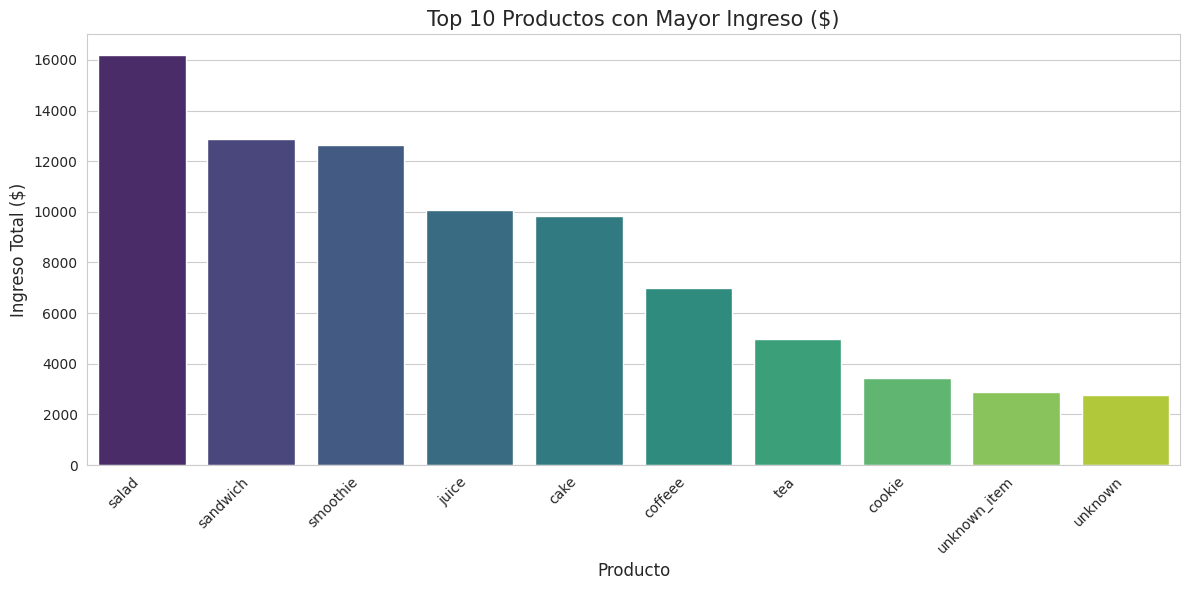


--- Insight Clave: Productos Top ---
El producto con mayor ingreso es: **Salad** con $16,198.00


In [ ]:
# Calcular los ingresos totales por ítem
ingresos_por_item = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=ingresos_por_item.index, y=ingresos_por_item.values, palette="viridis")
plt.title('Top 10 Productos con Mayor Ingreso ($)', fontsize=15)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() #

print("\n--- Insight Clave: Productos Top ---")
print(f"El producto con mayor ingreso es: **{ingresos_por_item.index[0].title()}** con ${ingresos_por_item.values[0]:,.2f}")

/tmp/ipython-input-1699462872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locaciones_reales.index.str.title(), y=locaciones_reales.values, palette="rocket")


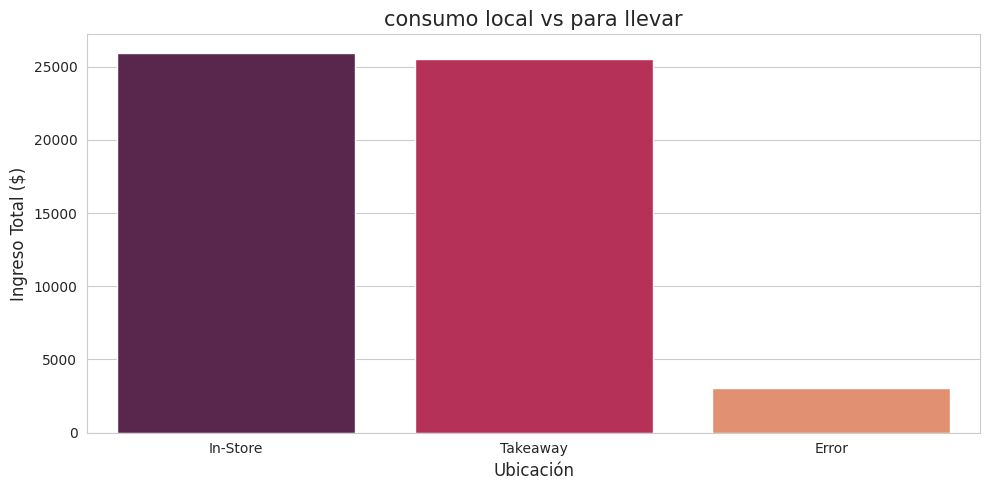


--- Insight Clave: Ubicación Más Rentable ---
Donde se consume mas es: **In-Store** con $25,906.50


In [ ]:
# Calcular donde se consume mas, en tienda o para llevar
ingresos_por_locacion = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
# Filtrar 'unknown' si no es relevante para el análisis de locaciones operativas
locaciones_reales = ingresos_por_locacion[ingresos_por_locacion.index != 'unknown']

sns.barplot(x=locaciones_reales.index.str.title(), y=locaciones_reales.values, palette="rocket")
plt.title('consumo local vs para llevar', fontsize=15)
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() #

print("\n--- Insight Clave: Ubicación Más Rentable ---")
print(f"Donde se consume mas es: **{locaciones_reales.index[0].title()}** con ${locaciones_reales.values[0]:,.2f}")

/tmp/ipython-input-2864010647.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_dia_semana = df.groupby('Day of Week')['Total Spent'].sum().reset_index()
/tmp/ipython-input-2864010647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of Week', y='Total Spent', data=ventas_por_dia_semana, palette='pastel')


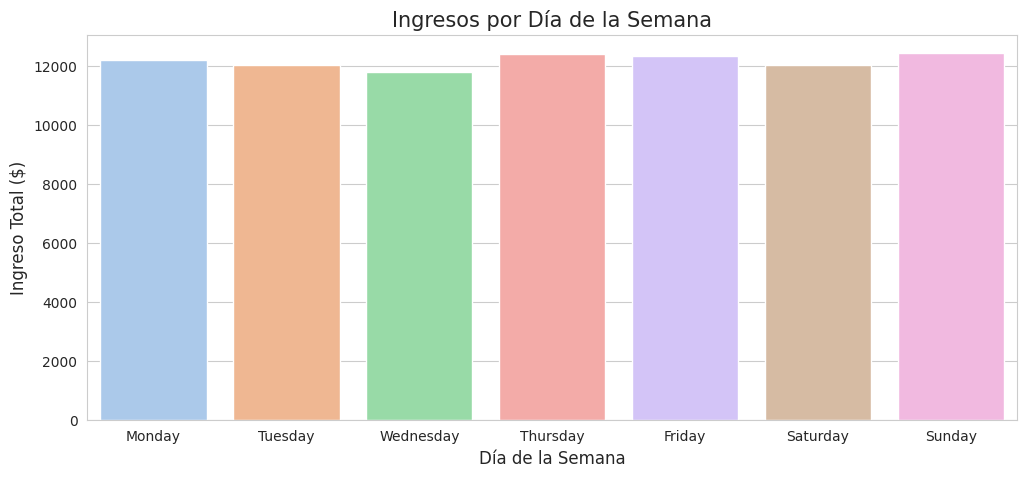


--- Insight Clave: Día Pico ---
El día más rentable es el **Sunday**. Esto debe influir en la planificación de turnos.


In [ ]:
# Ingresos por Día de la Semana
ventas_por_dia_semana = df.groupby('Day of Week')['Total Spent'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='Day of Week', y='Total Spent', data=ventas_por_dia_semana, palette='pastel')
plt.title('Ingresos por Día de la Semana', fontsize=15)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)
plt.show() #

print("\n--- Insight Clave: Día Pico ---")
dia_pico = ventas_por_dia_semana.sort_values(by='Total Spent', ascending=False)['Day of Week'].iloc[0]
print(f"El día más rentable es el **{dia_pico}**. Esto debe influir en la planificación de turnos.")

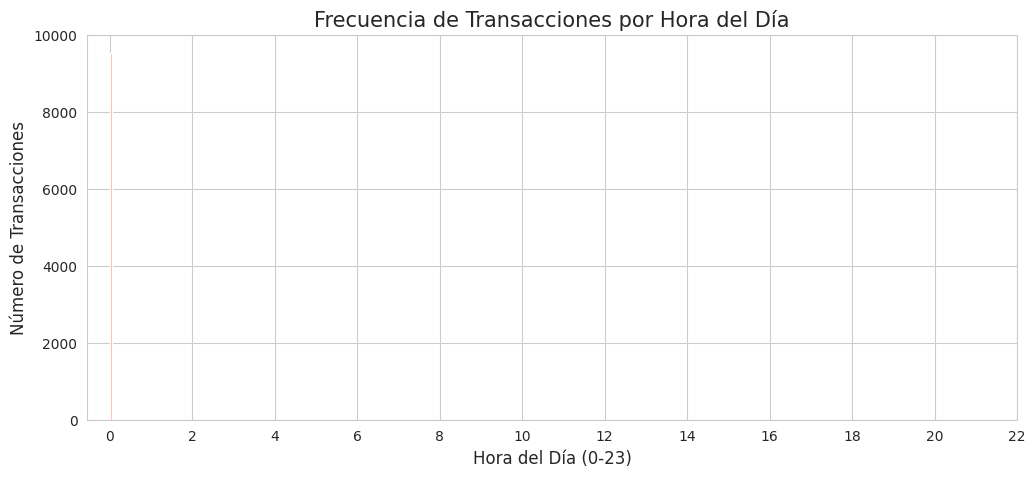


--- Insight Clave: Hora Pico ---
La hora pico de afluencia de clientes es alrededor de las **0:00**. Necesario reforzar el personal en este lapso.


In [ ]:
# Conteo de Transacciones por Hora del Día
plt.figure(figsize=(12, 5))
sns.histplot(df['Hour'], bins=24, kde=False, color='coral')
plt.title('Frecuencia de Transacciones por Hora del Día', fontsize=15)
plt.xlabel('Hora del Día (0-23)', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(range(0, 24, 2)) # Mostrar cada 2 horas para limpieza
plt.show() #

print("\n--- Insight Clave: Hora Pico ---")
hora_pico = df['Hour'].mode()[0]
print(f"La hora pico de afluencia de clientes es alrededor de las **{hora_pico}:00**. Necesario reforzar el personal en este lapso.")

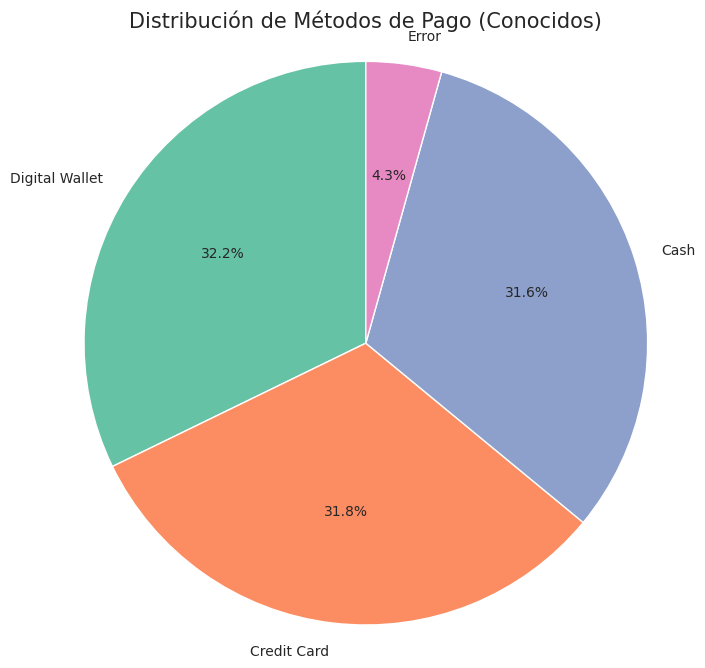


--- Insight Clave: Métodos de Pago ---
El método de pago dominante es **Digital Wallet**, lo que sugiere enfocar los esfuerzos de mantenimiento y seguridad en este canal.


In [ ]:
# Conteo de transacciones por método de pago
conteo_pago = df['Payment Method'].value_counts()
# Filtrar la categoría 'unknown' si su proporción es muy grande (debido a la imputación)
pago_conocido = conteo_pago[conteo_pago.index != 'unknown']

plt.figure(figsize=(8, 8))
plt.pie(pago_conocido, labels=pago_conocido.index.str.title(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribución de Métodos de Pago (Conocidos)', fontsize=15)
plt.axis('equal')
plt.show() # [Image of Payment Method Distribution Pie Chart]


print("\n--- Insight Clave: Métodos de Pago ---")
metodo_mas_usado = pago_conocido.index[0].title()
print(f"El método de pago dominante es **{metodo_mas_usado}**, lo que sugiere enfocar los esfuerzos de mantenimiento y seguridad en este canal.")

In [ ]:
# Muestra el conteo de frecuencias de los valores en la columna 'Hour'
print("--- Conteo de Frecuencias de la Columna 'Hour' ---")
print(df['Hour'].value_counts())

--- Conteo de Frecuencias de la Columna 'Hour' ---
Hour
0    9540
Name: count, dtype: int64
